In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
pd.set_option('display.max_rows', None)

In [81]:
# Import data
df = pd.read_csv(r"C:\Users\henry\OneDrive - Louisiana State University\Desktop\Personal Career\Dota2Predictor\dota.csv")

In [82]:
df.dropna(inplace=True)

In [83]:
df.tail()

,MatchID,Date,Hero,Match Duration,Result,Kills,Deaths,Assists,Networth,Team,Enemy_pos1,Enemy_pos2,Enemy_pos3,Enemy_pos4,Enemy_pos5,Ally_pos1,Ally_pos2,Ally_pos3,Ally_pos4
285,6.338322e+09,12/24/2021 3:36,lion,35:36:00,Lost,2.0,5.0,9.0,6500.0,Dire,medusa,templar_assassin,death_prophet,wisp,mirana,phantom_assassin,ember_spirit,magnataur,techies
286,6.338272e+09,12/24/2021 2:48,crystal_maiden,34:35:00,Won,13.0,6.0,21.0,11400.0,Radiant,juggernaut,skywrath_mage,legion_commander,weaver,ogre_magi,nevermore,invoker,spirit_breaker,snapfire
287,6.338214e+09,12/24/2021 1:53,rubick,34:54:00,Won,6.0,7.0,23.0,13600.0,Dire,life_stealer,pugna,phoenix,earth_spirit,silencer,skeleton_king,monkey_king,abyssal_underlord,ancient_apparition
288,6.338081e+09,12/23/2021 23:21,crystal_maiden,33:23:00,Won,2.0,3.0,16.0,9400.0,Dire,pudge,queenofpain,leshrac,witch_doctor,keeper_of_the_light,legion_commander,earth_spirit,nevermore,crystal_maiden
289,6.336077e+09,12/22/2021 19:19,crystal_maiden,36:17:00,Lost,5.0,9.0,18.0,7500.0,Radiant,phantom_lancer,obsidian_destroyer,snapfire,pudge,hoodwink,faceless_void,invoker,night_stalker,tusk


### Change Hero names to familiar names and remove out of position heroes

#### Position 1 Enemy Heroes

In [84]:
hero_count_pos1 = df['Enemy_pos1'].value_counts()

In [85]:
drop_heroes = hero_count_pos1[hero_count_pos1 < 5].index

In [86]:
hero_count_pos1 = hero_count_pos1.drop(drop_heroes)

In [87]:
enemy_heroes_pos1 = sorted(hero_count_pos1.to_dict())

In [88]:
enemy_pos1_winrates = {}

for hero in enemy_heroes_pos1:
    matches_of_hero = df[df['Enemy_pos1'] == hero]
    num_matches = len(matches_of_hero)
    num_won_matches = len(matches_of_hero[matches_of_hero['Result'] == 'Won'] == True)
    winrate = round(num_won_matches/num_matches * 100,2)
    enemy_pos1_winrates[hero] = winrate

In [89]:
descending_by_winrate = dict(sorted(enemy_pos1_winrates.items(), key=lambda item : item[1], reverse= True))

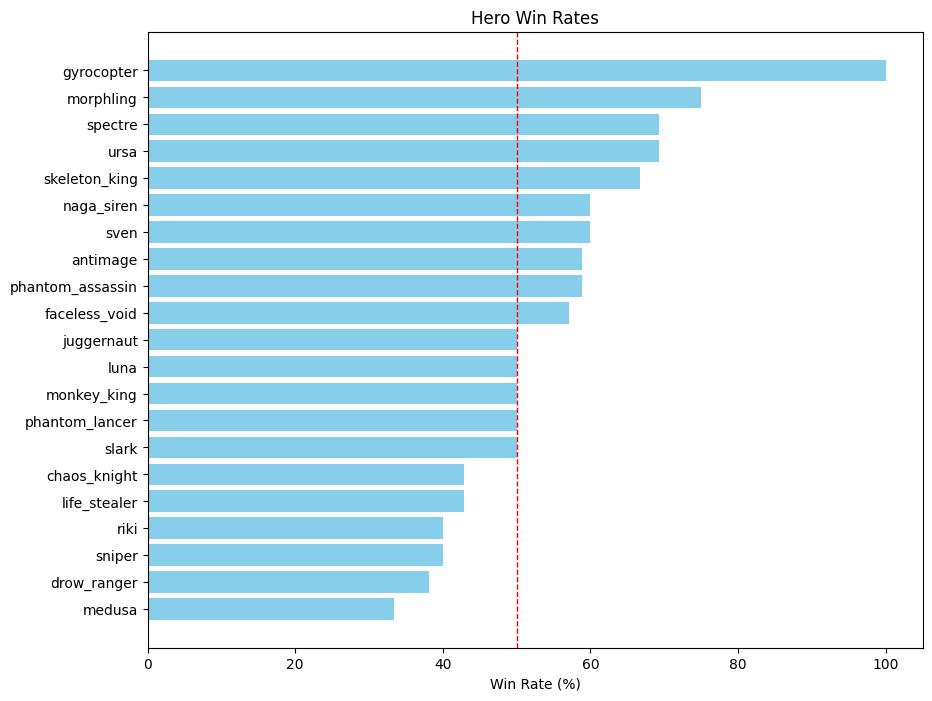

In [90]:
fig, ax = plt.subplots(figsize=(10, 8))
heroes = list(descending_by_winrate.keys())
win_rates = list(descending_by_winrate.values())

ax.barh(heroes, win_rates, color='skyblue')

ax.set_xlabel('Win Rate (%)')
ax.set_title('Hero Win Rates')

plt.gca().invert_yaxis()  # Invert the y-axis to display heroes with the highest win rate at the top
ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
plt.show()

### Graph Deaths vs. hero winrates

In [91]:
descending_by_winrate

{'gyrocopter': 100.0,
 'morphling': 75.0,
 'spectre': 69.23,
 'ursa': 69.23,
 'skeleton_king': 66.67,
 'naga_siren': 60.0,
 'sven': 60.0,
 'antimage': 58.82,
 'phantom_assassin': 58.82,
 'faceless_void': 57.14,
 'juggernaut': 50.0,
 'luna': 50.0,
 'monkey_king': 50.0,
 'phantom_lancer': 50.0,
 'slark': 50.0,
 'chaos_knight': 42.86,
 'life_stealer': 42.86,
 'riki': 40.0,
 'sniper': 40.0,
 'drow_ranger': 38.1,
 'medusa': 33.33}

In [92]:
filter = df[df['Enemy_pos1'] == 'gyrocopter']

In [93]:
df.head()

,MatchID,Date,Hero,Match Duration,Result,Kills,Deaths,Assists,Networth,Team,Enemy_pos1,Enemy_pos2,Enemy_pos3,Enemy_pos4,Enemy_pos5,Ally_pos1,Ally_pos2,Ally_pos3,Ally_pos4
0,7.343242e+09,9/19/2023 23:29,rubick,36:41:00,Lost,9.0,9.0,12.0,11200.0,Radiant,bloodseeker,primal_beast,centaur,spirit_breaker,venomancer,skeleton_king,invoker,legion_commander,earthshaker
1,7.341850e+09,9/19/2023 0:11,warlock,55:00:00,Lost,2.0,9.0,17.0,16400.0,Radiant,monkey_king,obsidian_destroyer,axe,jakiro,skywrath_mage,luna,invoker,kunkka,ancient_apparition
2,7.333781e+09,9/13/2023 22:15,rubick,47:42:00,Lost,1.0,9.0,21.0,11400.0,Dire,nevermore,obsidian_destroyer,axe,vengefulspirit,snapfire,sven,invoker,centaur,witch_doctor
3,7.333761e+09,9/13/2023 21:16,rubick,30:02:00,Lost,1.0,8.0,9.0,8000.0,Dire,juggernaut,sand_king,dawnbreaker,skywrath_mage,vengefulspirit,phantom_assassin,lone_druid,legion_commander,abaddon
4,7.325788e+09,9/8/2023 17:12,jakiro,42:19:00,Lost,6.0,8.0,16.0,15500.0,Dire,drow_ranger,razor,slardar,treant,warlock,muerta,lone_druid,spirit_breaker,silencer


In [94]:
enemy_pos1_deaths = {}
enemy_pos1_kills = {}
enemy_pos1_assists = {}
enemy_pos1_match_duration = {}
enemy_pos1_networth = {}

for hero in descending_by_winrate.keys():
    filter = df[df['Enemy_pos1'] == hero]

    avg_deaths = round(filter['Deaths'].mean(),2)
    avg_kills = round(filter['Kills'].mean(),2)
    avg_assists = round(filter['Assists'].mean(),2)
    avg_networth = round(filter['Networth'].mean(),2)

    enemy_pos1_deaths[hero] = avg_deaths
    enemy_pos1_kills[hero] = avg_kills
    enemy_pos1_assists[hero] = avg_assists
    enemy_pos1_networth[hero] = avg_networth
    
    
    

In [95]:
descending_by_deaths = dict(sorted(enemy_pos1_deaths.items(), key=lambda item : item[1], reverse= True))
descending_by_assits = dict(sorted(enemy_pos1_kills.items(), key=lambda item : item[1], reverse= True))
descending_by_assits = dict(sorted(enemy_pos1_assists.items(), key=lambda item : item[1], reverse= True))
descending_by_networth = dict(sorted(enemy_pos1_networth.items(), key=lambda item : item[1], reverse= True))

In [96]:
for hero,winrate in descending_by_winrate.items():
    descending_by_winrate[hero] = np.float64(descending_by_winrate[hero])

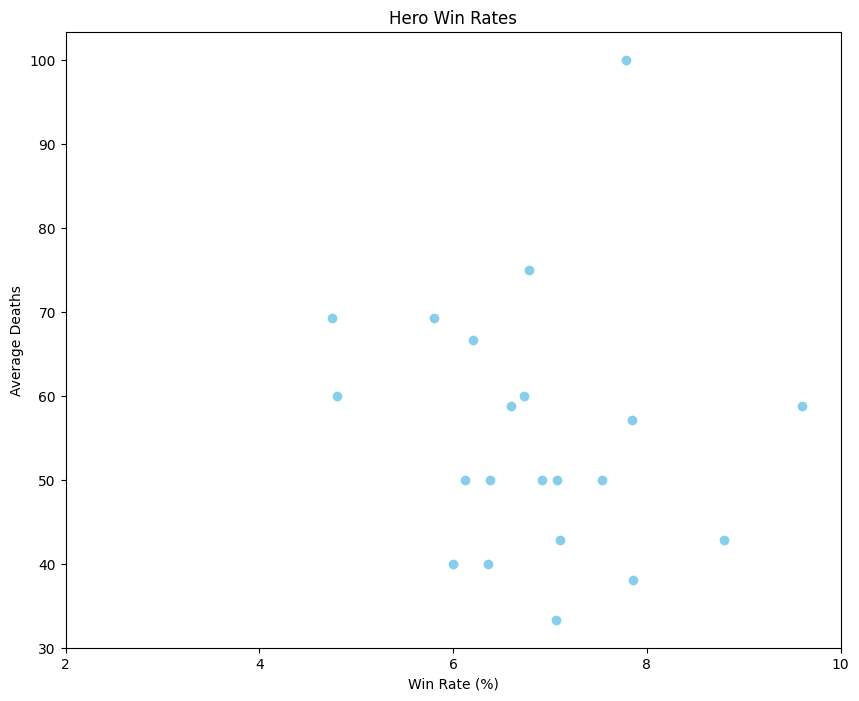

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))


ax.scatter(descending_by_deaths.values(), enemy_pos1_winrates.values(), color='skyblue')

ax.set_xlabel('Win Rate (%)')
ax.set_ylabel('Average Deaths')
ax.set_title('Hero Win Rates')

x_ticks = [2,4,6,8,10]
ax.set_xticks(x_ticks)



#plt.gca().invert_yaxis()  # Invert the y-axis to display heroes with the highest win rate at the top
plt.show()

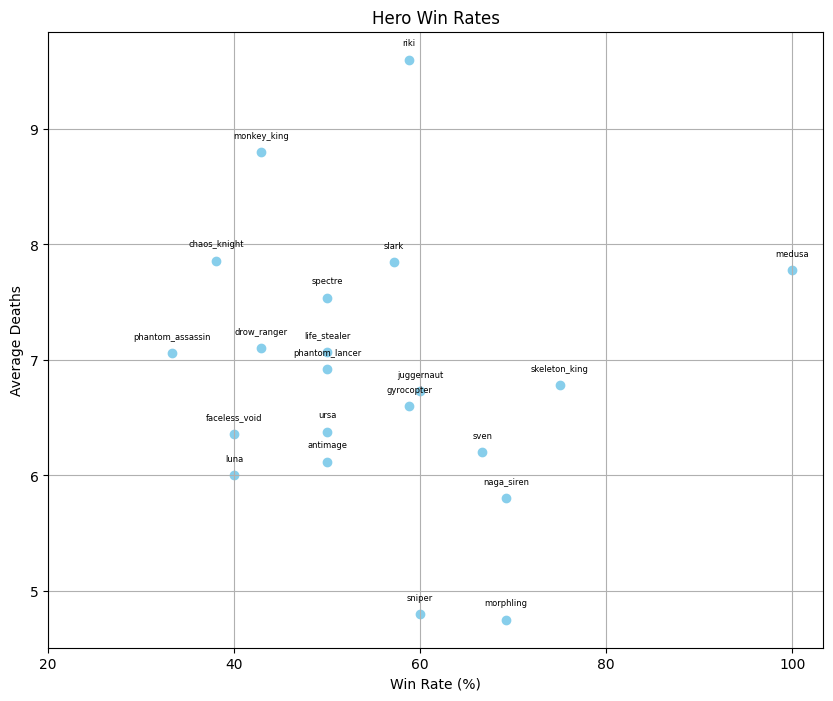

In [98]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatterplot
heroes = descending_by_deaths.keys()
scatter = ax.scatter(list(enemy_pos1_winrates.values()), list(descending_by_deaths.values()), color='skyblue')

# Label each point with its respective hero name
for hero, deaths, winrate in zip(heroes, descending_by_deaths.values(), enemy_pos1_winrates.values()):
    ax.annotate(hero, (winrate, deaths), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = '6')

# Set axis labels and title
ax.set_xlabel('Win Rate (%)')
ax.set_ylabel('Average Deaths')
ax.set_title('Hero Win Rates')

# Set custom tick marks for the x-axis
x_ticks = [20, 40, 60, 80, 100]
ax.set_xticks(x_ticks)

# Invert the y-axis to display heroes with the highest win rate at the top


# Show the plot
plt.grid(True)
plt.show()

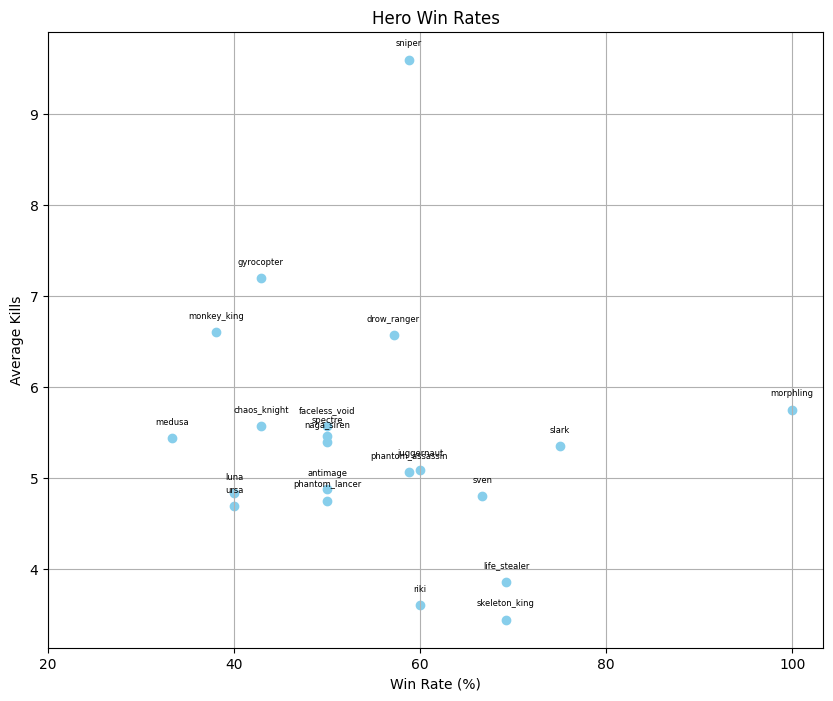

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatterplot
heroes = descending_by_kills.keys()
scatter = ax.scatter(list(enemy_pos1_winrates.values()), list(descending_by_kills.values()), color='skyblue')

# Label each point with its respective hero name
for hero, deaths, winrate in zip(heroes, descending_by_kills.values(), enemy_pos1_winrates.values()):
    ax.annotate(hero, (winrate, deaths), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = '6')

# Set axis labels and title
ax.set_xlabel('Win Rate (%)')
ax.set_ylabel('Average Kills')
ax.set_title('Hero Win Rates')

# Set custom tick marks for the x-axis
x_ticks = [20, 40, 60, 80, 100]
ax.set_xticks(x_ticks)

# Invert the y-axis to display heroes with the highest win rate at the top


# Show the plot
plt.grid(True)
plt.show()

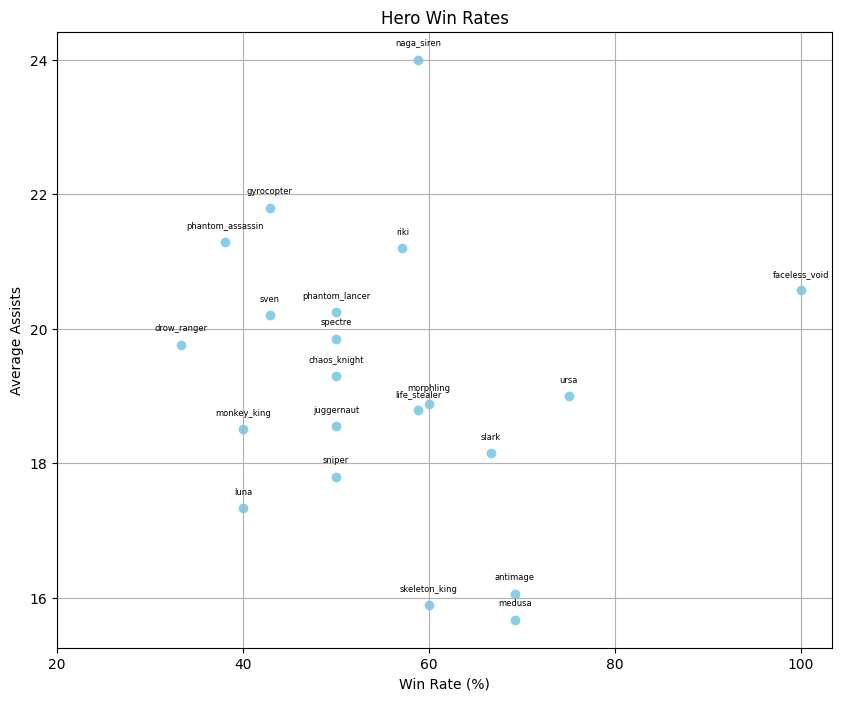

In [100]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatterplot
heroes = descending_by_assists.keys()
scatter = ax.scatter(list(enemy_pos1_winrates.values()), list(descending_by_assists.values()), color='skyblue')

# Label each point with its respective hero name
for hero, deaths, winrate in zip(heroes, descending_by_assists.values(), enemy_pos1_winrates.values()):
    ax.annotate(hero, (winrate, deaths), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = '6')

# Set axis labels and title
ax.set_xlabel('Win Rate (%)')
ax.set_ylabel('Average Assists')
ax.set_title('Hero Win Rates')

# Set custom tick marks for the x-axis
x_ticks = [20, 40, 60, 80, 100]
ax.set_xticks(x_ticks)

# Invert the y-axis to display heroes with the highest win rate at the top


# Show the plot
plt.grid(True)
plt.show()

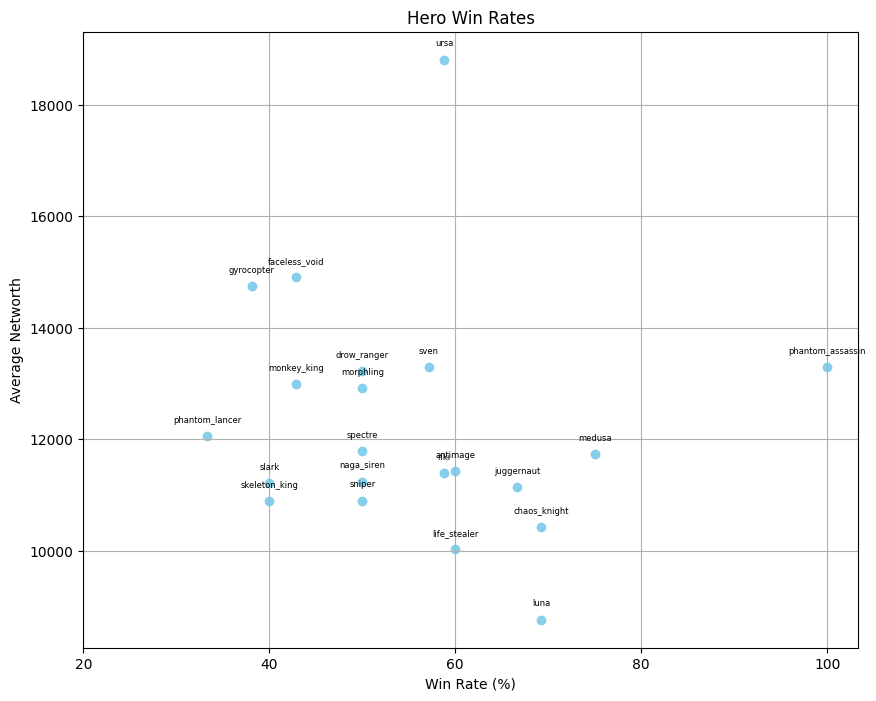

In [101]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatterplot
heroes = descending_by_networth.keys()
scatter = ax.scatter(list(enemy_pos1_winrates.values()), list(descending_by_networth.values()), color='skyblue')

# Label each point with its respective hero name
for hero, deaths, winrate in zip(heroes, descending_by_networth.values(), enemy_pos1_winrates.values()):
    ax.annotate(hero, (winrate, deaths), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = '6')

# Set axis labels and title
ax.set_xlabel('Win Rate (%)')
ax.set_ylabel('Average Networth')
ax.set_title('Hero Win Rates')

# Set custom tick marks for the x-axis
x_ticks = [20, 40, 60, 80, 100]
ax.set_xticks(x_ticks)

# Invert the y-axis to display heroes with the highest win rate at the top


# Show the plot
plt.grid(True)
plt.show()